In [131]:
# Display Dataset Information and Preview

import pandas as pd

# Load the dataset
file_path = 'C:\\Users\\Hello\\Desktop\\Mini_Project\\pre_owned_cars.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Display the first few rows
print("\nFirst Few Rows of the Dataset:")
print(df.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB
None

First Few Rows of the Dataset:
           Brand      model  Year  Age     kmDriven Transmission   Owner  \
0          Honda       City  2001   23    98,000 km       Manual  second   
1         Toyota     Innova  2009   15  190000.0 km       Manual  second   
2     Vol

In [132]:
# Check Missing Values Before Cleaning
print("\nMissing Values (Before Cleaning):")
print(df.isnull().sum())

# Clean the `kmDriven` Column
# Remove non-numeric characters and convert `kmDriven` to numeric
df['kmDriven'] = df['kmDriven'].str.replace(r'[^0-9]', '', regex=True)
df['kmDriven'] = pd.to_numeric(df['kmDriven'], errors='coerce')

# Handle Missing Values in `kmDriven` Column
# Fill missing values with the median
df['kmDriven'].fillna(df['kmDriven'].median(), inplace=True)

# Check Missing Values After Cleaning
print("\nMissing Values (After Cleaning `kmDriven`):")
print(df.isnull().sum())

# Display Cleaned `kmDriven` Column
print("\nFirst 5 Values of `kmDriven` After Cleaning:")
print(df['kmDriven'].head())



Missing Values (Before Cleaning):
Brand            0
model            0
Year             0
Age              0
kmDriven        47
Transmission     0
Owner            0
FuelType         0
PostedDate       0
AdditionInfo     0
AskPrice         0
dtype: int64

Missing Values (After Cleaning `kmDriven`):
Brand           0
model           0
Year            0
Age             0
kmDriven        0
Transmission    0
Owner           0
FuelType        0
PostedDate      0
AdditionInfo    0
AskPrice        0
dtype: int64

First 5 Values of `kmDriven` After Cleaning:
0      98000.0
1    1900000.0
2      77246.0
3      83500.0
4      45000.0
Name: kmDriven, dtype: float64


In [133]:
# Cleaning and Handling Missing Values in `AskPrice`

# Display Unique Values Before Cleaning
print("\nUnique `AskPrice` Values Before Cleaning:")
print(df['AskPrice'].unique()[:5])

# Remove Non-Numeric Characters
# Remove currency symbols, commas, and other non-numeric characters
df['AskPrice'] = df['AskPrice'].str.replace(r'[^0-9]', '', regex=True)

# Convert `AskPrice` to Numeric
df['AskPrice'] = pd.to_numeric(df['AskPrice'], errors='coerce')

# Check Missing Values Before Handling
print("\nMissing Values in `AskPrice` Before Filling:")
print(df['AskPrice'].isnull().sum())

# Fill Missing Values with Median
df['AskPrice'].fillna(df['AskPrice'].median(), inplace=True)

# Display Unique Values After Cleaning
print("\nUnique `AskPrice` Values After Cleaning:")
print(df['AskPrice'].unique()[:5])

# Check Missing Values After Handling
print("\nMissing Values in `AskPrice` After Filling:")
print(df['AskPrice'].isnull().sum())

# Display First 5 Values of Cleaned `AskPrice`
print("\nFirst 5 Values of `AskPrice` After Cleaning and Handling Missing Values:")
print(df['AskPrice'].head())



Unique `AskPrice` Values Before Cleaning:
['₹ 1,95,000' '₹ 3,75,000' '₹ 1,84,999' '₹ 5,65,000' '₹ 6,85,000']

Missing Values in `AskPrice` Before Filling:
0

Unique `AskPrice` Values After Cleaning:
[195000 375000 184999 565000 685000]

Missing Values in `AskPrice` After Filling:
0

First 5 Values of `AskPrice` After Cleaning and Handling Missing Values:
0    195000
1    375000
2    184999
3    565000
4    685000
Name: AskPrice, dtype: int64


In [134]:
# Cleaning and Converting the `PostedDate` Column

# Display unique values before conversion
print("\nUnique `PostedDate` Values Before Conversion:")
print(df['PostedDate'].unique()[:5])

# Convert `PostedDate` to datetime format
# Assuming the format is like 'Jan-25', we parse it using '%b-%y'
df['PostedDate'] = pd.to_datetime(df['PostedDate'], format='%b-%y', errors='coerce')

# Display unique values after conversion
print("\nUnique `PostedDate` Values After Conversion:")
print(df['PostedDate'].unique()[:5])



Unique `PostedDate` Values Before Conversion:
['Nov-24' 'Jul-24' 'Oct-24' 'Aug-24' 'Sep-24']

Unique `PostedDate` Values After Conversion:
<DatetimeArray>
['2024-11-01 00:00:00', '2024-07-01 00:00:00', '2024-10-01 00:00:00',
 '2024-08-01 00:00:00', '2024-09-01 00:00:00']
Length: 5, dtype: datetime64[ns]


In [135]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
print("\nNumber of duplicate rows: ", duplicate_rows.sum())

# Display duplicate rows (if any)
if duplicate_rows.sum() > 0:
    print("\nDuplicate Rows:")
    print(df[duplicate_rows])

# Remove duplicate rows
df = df.drop_duplicates()

# Verify if duplicates are removed
print("\nNumber of rows after removing duplicates: ", len(df))



Number of duplicate rows:  724

Duplicate Rows:
              Brand      model  Year  Age   kmDriven Transmission   Owner  \
146            Audi         A3  2015    9    42000.0    Automatic  second   
152           Honda       City  2016    8    93000.0    Automatic  second   
199            Audi         A3  2015    9    42000.0    Automatic  second   
221          Toyota      Camry  2015    9    68000.0    Automatic  second   
230   Mercedes-Benz  GLE COUPE  2021    3    32000.0    Automatic  second   
...             ...        ...   ...  ...        ...          ...     ...   
9510            BMW         X1  2020    4    45000.0    Automatic   first   
9518     Volkswagen  VentoTest  2014   10    72900.0    Automatic  second   
9540  Maruti Suzuki  Celerio-X  2020    4   142000.0    Automatic  second   
9542  Maruti Suzuki    Celerio  2015    9  1030000.0    Automatic  second   
9562            BMW   5 Series  2016    8    47000.0    Automatic  second   

        FuelType PostedDat

In [136]:
print("Dataset Information:")
print(df.info())

# Display the first few rows
print("\nFirst Few Rows of the Dataset:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 8858 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Brand         8858 non-null   object        
 1   model         8858 non-null   object        
 2   Year          8858 non-null   int64         
 3   Age           8858 non-null   int64         
 4   kmDriven      8858 non-null   float64       
 5   Transmission  8858 non-null   object        
 6   Owner         8858 non-null   object        
 7   FuelType      8858 non-null   object        
 8   PostedDate    8858 non-null   datetime64[ns]
 9   AdditionInfo  8858 non-null   object        
 10  AskPrice      8858 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 830.4+ KB
None

First Few Rows of the Dataset:
           Brand      model  Year  Age   kmDriven Transmission   Owner  \
0          Honda       City  2001

In [137]:
# Check duplicate count before removal
print("\nDuplicate Rows (Before Cleaning):", df.duplicated().sum())

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Check duplicate count after removal
print("\nDuplicate Rows (After Cleaning):", df.duplicated().sum())



Duplicate Rows (Before Cleaning): 0

Duplicate Rows (After Cleaning): 0


In [138]:
df['Age'].unique()

array([23, 15, 14,  7,  5, 10,  4,  6,  3, 12, 17,  8,  9,  1, 13,  2, 11,
       18, 19,  0, 26, 16, 20, 30, 22, 21, 27, 24, 34, 28, 25, 38],
      dtype=int64)

In [139]:
df[df.Age>20]

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,98000.0,Manual,second,Petrol,2024-11-01,"Honda City v teck in mint condition, valid gen...",195000
204,Maruti Suzuki,Omni,1998,26,80000.0,Manual,second,Petrol,2024-11-01,Maruti Suzuki Omni 1998 Petrol 80000 Km Driven,75000
508,Mahindra,Jeep,1994,30,0.0,Manual,second,Diesel,2024-11-01,"Mahindra Jeep Commander 750 DI, 1994, Diesel",275000
982,Hyundai,Verna,2002,22,160000.0,Manual,first,Diesel,2024-11-01,"Hyundai Verna CRDi 1.6 SX, 2002, Diesel",385000
1303,Hyundai,Santro,2002,22,150000.0,Manual,second,Petrol,2024-11-01,Hyundai Santro 2002 Petrol Well Maintained,110000
1358,Maruti Suzuki,Zen-Estilo,2003,21,100000.0,Manual,second,Petrol,2024-11-01,All parts available for zen vxi,100000
1390,Maruti Suzuki,800,1997,27,28000.0,Manual,first,Petrol,2024-11-01,Maruti Suzuki 800 1997 Petrol 28000 Km Driven,60000
1600,Maruti Suzuki,Zen-Estilo,2003,21,33000.0,Manual,second,Petrol,2024-11-01,"Maruti Suzuki Zen Estilo VXI BSIV, 2003, Petrol",129000
1658,Maruti Suzuki,800,2000,24,50000.0,Manual,second,Petrol,2024-11-01,Maruti Suzuki 800 2000 Petrol Well Maintained,90000
1751,Mahindra,Marshal,2000,24,55000.0,Manual,second,Diesel,2024-11-01,Want NOC for Mahindra Marshal or Commander,15000


In [140]:
df['Brand'].unique()

array(['Honda', 'Toyota', 'Volkswagen', 'Maruti Suzuki', 'BMW', 'Ford',
       'Kia', 'Mercedes-Benz', 'Hyundai', 'Audi', 'Renault', 'MG',
       'Volvo', 'Skoda', 'Tata', 'Mahindra', 'Mini', 'Land Rover', 'Jeep',
       'Chevrolet', 'Jaguar', 'Fiat', 'Aston Martin', 'Porsche', 'Nissan',
       'Force', 'Mitsubishi', 'Lexus', 'Isuzu', 'Datsun', 'Ambassador',
       'Rolls-Royce', 'ICML', 'Bajaj', 'Opel', 'Ashok', 'Bentley',
       'Ssangyong', 'Maserati'], dtype=object)

In [141]:
df.to_csv('pre_owned_2.csv', index=False)

In [142]:
df.shape

(8858, 11)

              Year          Age      kmDriven                     PostedDate  \
count  8858.000000  8858.000000  8.858000e+03                           8858   
mean   2016.377060     7.622940  1.190673e+05  2024-10-27 06:27:04.023481856   
min    1986.000000     0.000000  0.000000e+00            2023-12-01 00:00:00   
25%    2014.000000     5.000000  4.656950e+04            2024-11-01 00:00:00   
50%    2017.000000     7.000000  6.971950e+04            2024-11-01 00:00:00   
75%    2019.000000    10.000000  9.500000e+04            2024-11-01 00:00:00   
max    2024.000000    38.000000  8.000000e+06            2024-11-01 00:00:00   
std       4.134203     4.134203  2.285606e+05                            NaN   

           AskPrice  
count  8.858000e+03  
mean   1.038403e+06  
min    1.500000e+04  
25%    3.500000e+05  
50%    5.900000e+05  
75%    1.075000e+06  
max    4.250000e+07  
std    1.649619e+06  


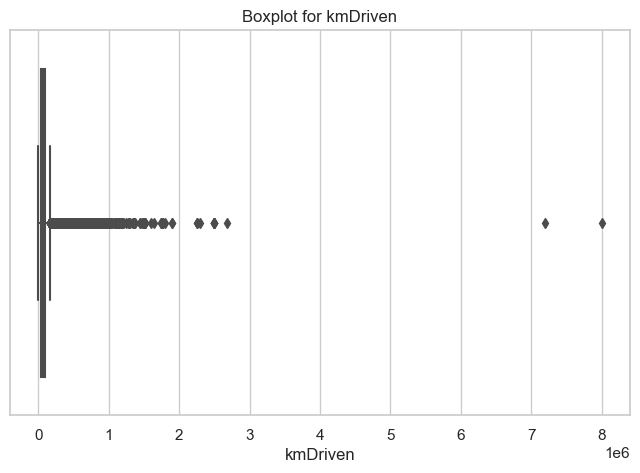

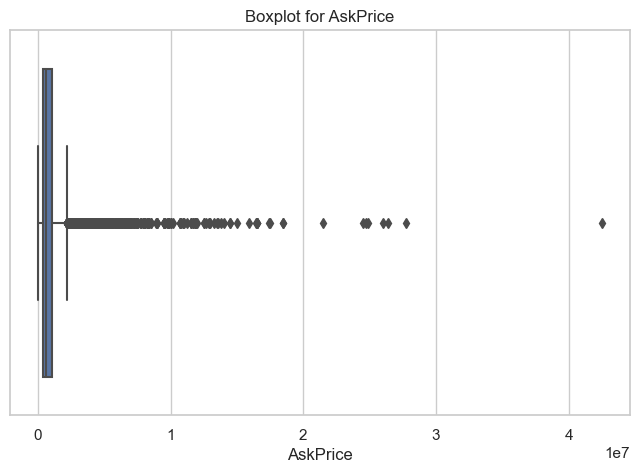

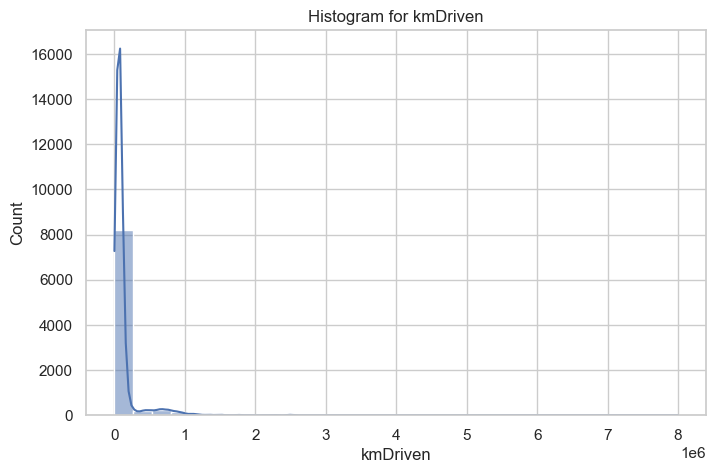

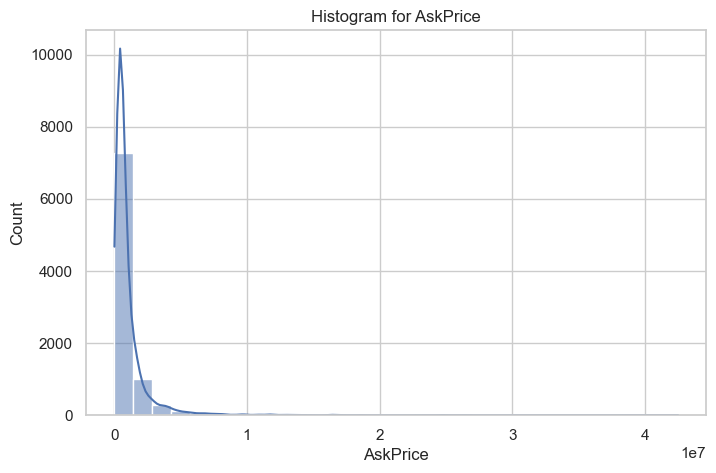

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Check basic info
print(df.describe())

# Visualize outliers using boxplots
numerical_columns = ['kmDriven', 'AskPrice']

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

# Histograms for distribution
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram for {col}')
    plt.show()


In [144]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers, lower_bound, upper_bound

for col in numerical_columns:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"\nOutliers in {col}:\n{outliers}")
    print(f"{col} Lower Bound: {lower}, Upper Bound: {upper}")



Outliers in kmDriven:
              Brand     model  Year  Age   kmDriven Transmission   Owner  \
1            Toyota    Innova  2009   15  1900000.0       Manual  second   
6            Toyota    Innova  2014   10   168000.0       Manual  second   
22            Honda      City  2010   14   990000.0       Manual   first   
43           Toyota  Fortuner  2011   13   193000.0       Manual  second   
44    Mercedes-Benz   C-Class  2015    9   650000.0    Automatic   first   
...             ...       ...   ...  ...        ...          ...     ...   
9477          Volvo      XC60  2020    4   480000.0    Automatic   first   
9502  Maruti Suzuki   Celerio  2017    7   650000.0    Automatic   first   
9560  Maruti Suzuki      Ritz  2012   12   243000.0       Manual  second   
9566          Honda      WR-V  2021    3   680000.0       Manual   first   
9567  Maruti Suzuki    Baleno  2022    2   220000.0       Manual   first   

     FuelType PostedDate                                       A

In [145]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

for col in numerical_columns:
    df = remove_outliers(df, col)

# Check the updated dataset
print(f"Dataset shape after removing outliers: {df.shape}")


Dataset shape after removing outliers: (7214, 11)


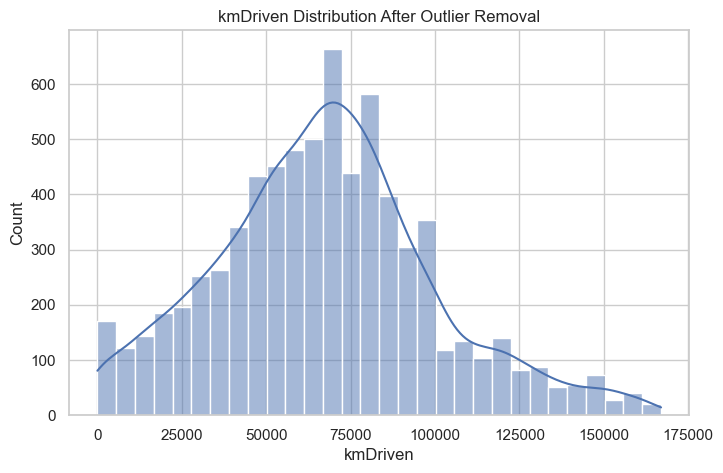

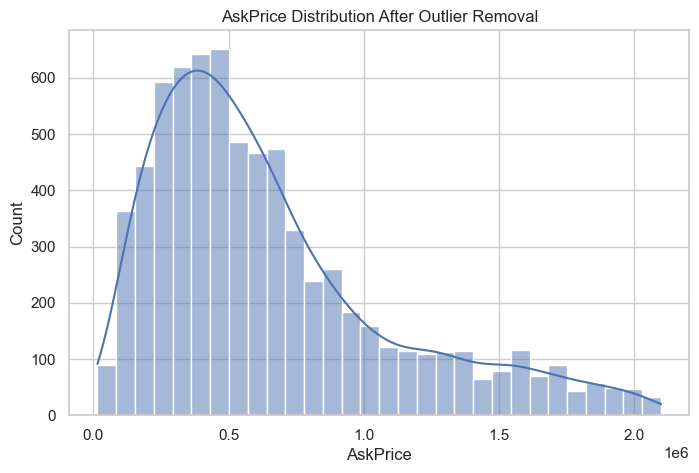

In [146]:
# Visualizing after outlier removal
for col in ['kmDriven', 'AskPrice']:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} Distribution After Outlier Removal')
    plt.show()


In [147]:
# Define thresholds for reasonable kmDriven values
min_km = 1000
max_km = 300000

# Filter rows that are outside this range
invalid_km = df[(df['kmDriven'] < min_km) | (df['kmDriven'] > max_km)]
print(f"Number of invalid 'kmDriven' entries: {invalid_km.shape[0]}")

# Display invalid rows, if any
if not invalid_km.empty:
    print("\nInvalid kmDriven rows:")
    print(invalid_km)

# Optional: Remove rows with invalid kmDriven values
df2 = df[(df['kmDriven'] >= min_km) & (df['kmDriven'] <= max_km)]
print(f"Dataset shape after filtering 'kmDriven': {df2.shape}")

Number of invalid 'kmDriven' entries: 104

Invalid kmDriven rows:
              Brand        model  Year  Age  kmDriven Transmission   Owner  \
48    Maruti Suzuki         Ciaz  2018    6       0.0       Manual   first   
108        Mahindra       Bolero  2015    9      16.0       Manual   first   
269            Tata    Nano Genx  2016    8      58.0    Automatic  second   
270   Maruti Suzuki  Swift-Dzire  2016    8      25.0       Manual  second   
386              MG        ASTOR  2024    0     260.0       Manual   first   
...             ...          ...   ...  ...       ...          ...     ...   
9245          Honda         City  2010   14      69.0    Automatic  second   
9408        Hyundai          i20  2012   12       1.0       Manual  second   
9548        Hyundai          i10  2010   14      25.0    Automatic  second   
9550           Tata       Safari  2010   14       0.0       Manual  second   
9564  Maruti Suzuki  Wagon-R-1-0  2019    5      35.0    Automatic  second  

In [148]:
# Define thresholds for reasonable AskPrice values
min_price = 50000
max_price = 5000000

# Filter rows that are outside this range
invalid_price = df2[(df2['AskPrice'] < min_price) | (df2['AskPrice'] > max_price)]
print(f"Number of invalid 'AskPrice' entries: {invalid_price.shape[0]}")

# Display invalid rows, if any
if not invalid_price.empty:
    print("\nInvalid AskPrice rows:")
    print(invalid_price)

# Optional: Remove rows with invalid AskPrice values
df3 = df2[(df2['AskPrice'] >= min_price) & (df2['AskPrice'] <= max_price)]
print(f"Dataset shape after filtering 'AskPrice': {df3.shape}")


Number of invalid 'AskPrice' entries: 19

Invalid AskPrice rows:
              Brand       model  Year  Age  kmDriven Transmission   Owner  \
271   Maruti Suzuki    Alto-800  2006   18   20024.0       Manual   first   
934   Maruti Suzuki  Zen-Estilo  2005   19   74000.0       Manual  second   
1408           Tata        Nano  2010   14   50000.0       Manual  second   
1751       Mahindra     Marshal  2000   24   55000.0       Manual  second   
1878           Tata        Nano  2011   13   40000.0       Manual  second   
1915  Maruti Suzuki         800  2006   18   65328.0       Manual  second   
3034  Maruti Suzuki      Baleno  2024    0    9000.0       Manual   first   
3906  Mercedes-Benz         GLS  2021    3  100000.0    Automatic   first   
5663  Maruti Suzuki     Wagon-R  2020    4   68000.0       Manual  second   
6232  Maruti Suzuki         800  1998   26   98000.0       Manual  second   
6360  Maruti Suzuki         800  1994   30   70120.0    Automatic  second   
7242  Marut

In [149]:
df=df3
# Summary of the dataset after validation
print("Dataset Summary:")
print(df.describe())

# Checking the range of kmDriven and AskPrice
print("\nRange of 'kmDriven':", df['kmDriven'].min(), "-", df['kmDriven'].max())
print("Range of 'AskPrice':", df['AskPrice'].min(), "-", df['AskPrice'].max())


Dataset Summary:
              Year          Age       kmDriven                     PostedDate  \
count  7091.000000  7091.000000    7091.000000                           7091   
mean   2016.173882     7.826118   68554.259484  2024-10-28 06:11:37.560287488   
min    1986.000000     0.000000    1000.000000            2023-12-01 00:00:00   
25%    2014.000000     5.000000   48000.000000            2024-11-01 00:00:00   
50%    2016.000000     8.000000   68000.000000            2024-11-01 00:00:00   
75%    2019.000000    10.000000   86000.000000            2024-11-01 00:00:00   
max    2024.000000    38.000000  167000.000000            2024-11-01 00:00:00   
std       4.072866     4.072866   31735.798646                            NaN   

           AskPrice  
count  7.091000e+03  
mean   6.592083e+05  
min    5.000000e+04  
25%    3.341665e+05  
50%    5.400000e+05  
75%    8.500000e+05  
max    2.100000e+06  
std    4.480090e+05  

Range of 'kmDriven': 1000.0 - 167000.0
Range of 'AskPr

In [150]:
df.shape

(7091, 11)

In [151]:
df.shape

(7091, 11)

In [152]:
# Define thresholds for reasonable AskPrice values
min_price = 30000      # Assuming no used car is realistically below this
max_price = 8000000    # Upper bound, based on luxury car prices

# Filter rows that are outside this range
invalid_price = df[(df['AskPrice'] < min_price) | (df['AskPrice'] > max_price)]
print(f"Number of invalid 'AskPrice' entries: {invalid_price.shape[0]}")

# Display invalid rows, if any
if not invalid_price.empty:
    print("\nInvalid AskPrice rows:")
    print(invalid_price)

# Remove those rows
df_cleaned = df[(df['AskPrice'] >= min_price) & (df['AskPrice'] <= max_price)]
print(f"Final dataset shape after filtering 'AskPrice': {df_cleaned.shape}")


Number of invalid 'AskPrice' entries: 0
Final dataset shape after filtering 'AskPrice': (7091, 11)


In [153]:
print(df['AskPrice'].describe())
print("Lowest AskPrices:")
print(df.nsmallest(5, 'AskPrice'))

print("\nHighest AskPrices:")
print(df.nlargest(5, 'AskPrice'))
print(df['AskPrice'].value_counts().head(10))  # Most common prices


count    7.091000e+03
mean     6.592083e+05
std      4.480090e+05
min      5.000000e+04
25%      3.341665e+05
50%      5.400000e+05
75%      8.500000e+05
max      2.100000e+06
Name: AskPrice, dtype: float64
Lowest AskPrices:
              Brand      model  Year  Age  kmDriven Transmission   Owner  \
2541           Tata  Indica V2  2007   17   54000.0       Manual  second   
3689  Maruti Suzuki        800  2013   11   75893.0       Manual  second   
5976      Chevrolet  Sail U-VA  2010   14   85000.0    Automatic  second   
6726     Volkswagen       Ameo  2017    7   83000.0    Automatic   first   
7726        Hyundai     Santro  2003   21   65804.0       Manual  second   

        FuelType PostedDate                                AdditionInfo  \
2541      Petrol 2024-11-01  Tata Indica V2 2007 Petrol 54000 Km Driven   
3689      Petrol 2024-11-01   Yes.             Yes.                 Yes   
5976  Hybrid/CNG 2024-11-01                              Good condition   
6726      Diesel 2

In [154]:
# Step 1: kmDriven Analysis
print(df_cleaned['kmDriven'].describe())

# Check min and max values
print("\nLowest kmDriven values:")
print(df_cleaned.sort_values(by='kmDriven', ascending=True).head())

print("\nHighest kmDriven values:")
print(df_cleaned.sort_values(by='kmDriven', ascending=False).head())

# Most common kmDriven values
print("\nMost frequent kmDriven values:")
print(df_cleaned['kmDriven'].value_counts().head(10))


count      7091.000000
mean      68554.259484
std       31735.798646
min        1000.000000
25%       48000.000000
50%       68000.000000
75%       86000.000000
max      167000.000000
Name: kmDriven, dtype: float64

Lowest kmDriven values:
              Brand        model  Year  Age  kmDriven Transmission  Owner  \
7585  Maruti Suzuki  Swift-Dzire  2015    9    1000.0    Automatic  first   
4488  Maruti Suzuki        Dzire  2023    1    1234.0       Manual  first   
6941        Hyundai         Aura  2024    0    1234.0       Manual  first   
6305  Maruti Suzuki  Swift-Dzire  2024    0    1234.0    Automatic  first   
6320  Maruti Suzuki         Eeco  2024    0    1300.0    Automatic  first   

        FuelType PostedDate  \
7585  Hybrid/CNG 2024-11-01   
4488  Hybrid/CNG 2024-11-01   
6941  Hybrid/CNG 2024-11-01   
6305  Hybrid/CNG 2024-11-01   
6320  Hybrid/CNG 2024-11-01   

                                           AdditionInfo  AskPrice  
7585                                   Int

In [155]:
print(df_cleaned['Age'].describe())
print("\nLowest Age entries (newest cars):")
print(df_cleaned[df_cleaned['Age'] == df_cleaned['Age'].min()].head())

print("\nHighest Age entries (oldest cars):")
print(df_cleaned[df_cleaned['Age'] == df_cleaned['Age'].max()].head())
print("\nMost frequent Age values:")
print(df_cleaned['Age'].value_counts().head(10))


count    7091.000000
mean        7.826118
std         4.072866
min         0.000000
25%         5.000000
50%         8.000000
75%        10.000000
max        38.000000
Name: Age, dtype: float64

Lowest Age entries (newest cars):
             Brand            model  Year  Age  kmDriven Transmission  Owner  \
181  Maruti Suzuki      Swift-Dzire  2024    0   22000.0       Manual  first   
413  Maruti Suzuki            Swift  2024    0    6000.0    Automatic  first   
444          Honda          City ZX  2024    0   69000.0    Automatic  first   
527  Maruti Suzuki     Grand Vitara  2024    0    1600.0       Manual  first   
564       Mahindra  Scorpio Classic  2024    0   33000.0       Manual  first   

    FuelType PostedDate                                       AdditionInfo  \
181   Petrol 2024-10-01    Maruti Suzuki Swift Dzire 1.3 VXI, 2024, Petrol   
413   Petrol 2024-11-01     Maruti Suzuki Swift AMT ZXI Plus, 2024, Petrol   
444   Petrol 2024-11-01                                 

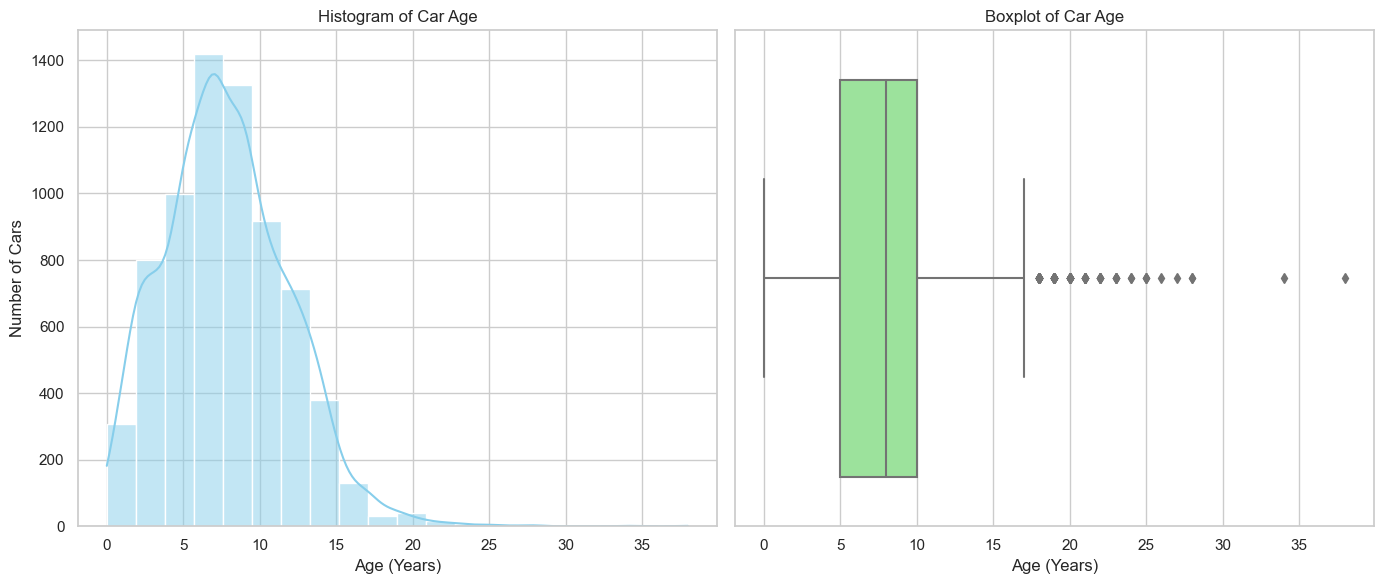

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visuals
sns.set(style="whitegrid")

# Create a figure with subplots for histogram and boxplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram of Age
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Histogram of Car Age')
axes[0].set_xlabel('Age (Years)')
axes[0].set_ylabel('Number of Cars')

# Boxplot of Age
sns.boxplot(x=df['Age'], ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot of Car Age')
axes[1].set_xlabel('Age (Years)')

plt.tight_layout()
plt.show()


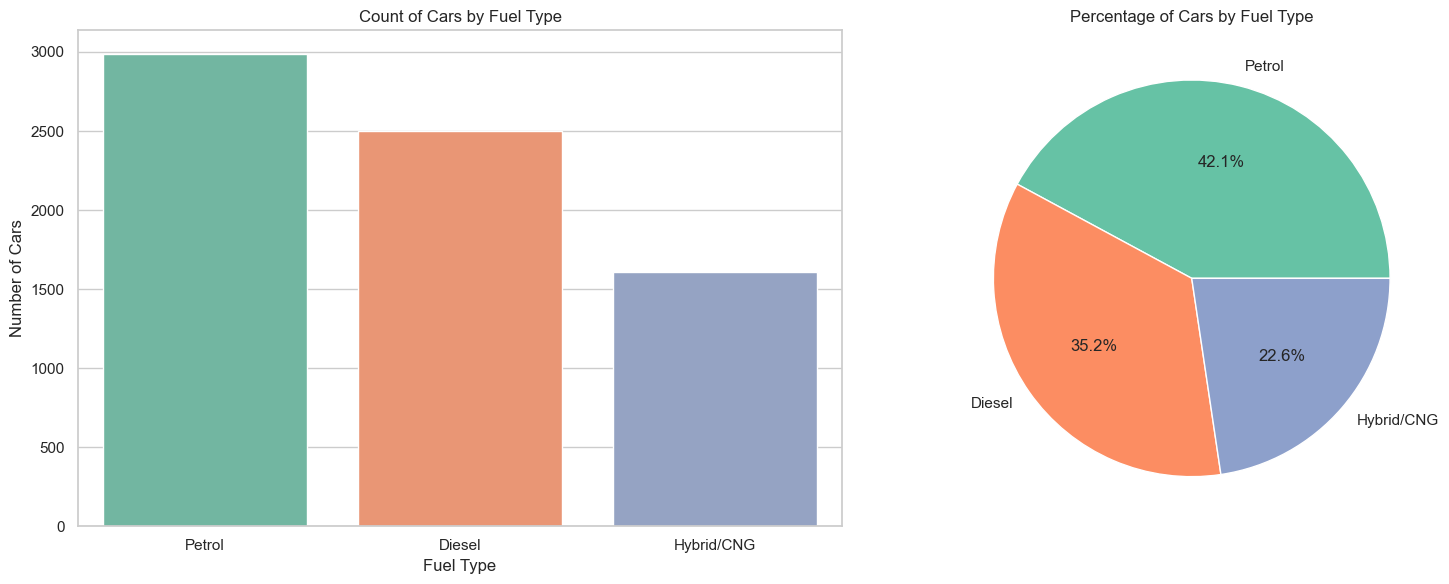

In [157]:
sns.set_style("whitegrid")

# Count of each FuelType
fuel_counts = df['FuelType'].value_counts()

# Create subplots for bar and pie charts
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar Plot
sns.barplot(x=fuel_counts.index, y=fuel_counts.values, palette="Set2", ax=axes[0])
axes[0].set_title('Count of Cars by Fuel Type')
axes[0].set_xlabel('Fuel Type')
axes[0].set_ylabel('Number of Cars')

# Pie Chart
axes[1].pie(fuel_counts.values, labels=fuel_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
axes[1].set_title('Percentage of Cars by Fuel Type')

plt.tight_layout()
plt.show()

In [158]:
df['FuelType'].value_counts()


FuelType
Petrol        2987
Diesel        2498
Hybrid/CNG    1606
Name: count, dtype: int64

In [159]:
df.shape

(7091, 11)

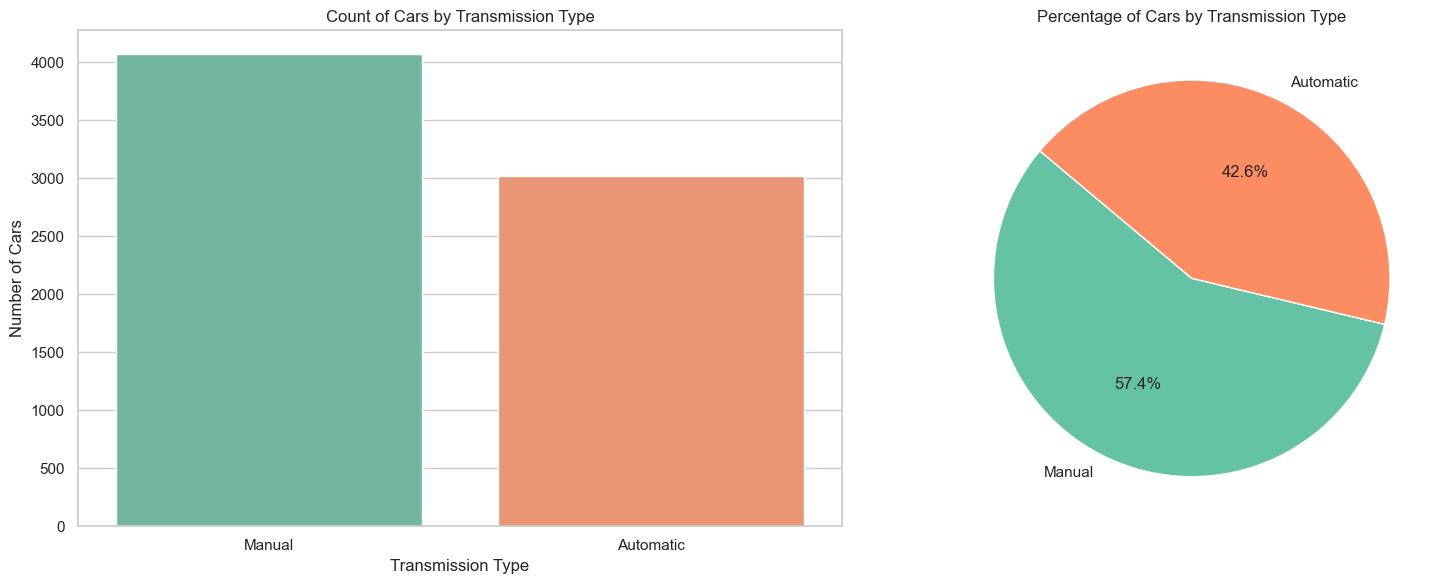

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Create subplots for side-by-side visualization
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot (count of cars by Transmission)
sns.countplot(data=df, x='Transmission', ax=ax[0], palette='Set2')
ax[0].set_title("Count of Cars by Transmission Type")
ax[0].set_ylabel("Number of Cars")
ax[0].set_xlabel("Transmission Type")

# Pie chart (percentage of Transmission types)
transmission_counts = df['Transmission'].value_counts()
ax[1].pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
ax[1].set_title("Percentage of Cars by Transmission Type")

plt.tight_layout()
plt.show()


In [161]:
df.columns

Index(['Brand', 'model', 'Year', 'Age', 'kmDriven', 'Transmission', 'Owner',
       'FuelType', 'PostedDate', 'AdditionInfo', 'AskPrice'],
      dtype='object')

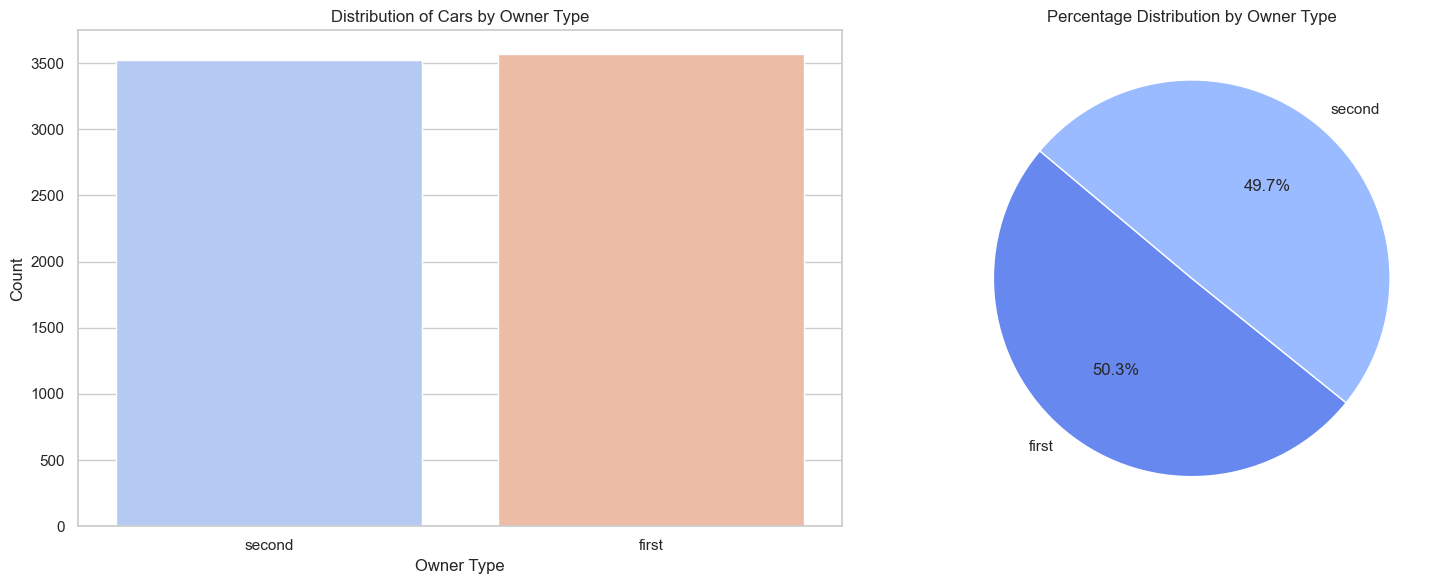

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Countplot
sns.countplot(data=df, x='Owner', ax=ax[0], palette='coolwarm')
ax[0].set_title("Distribution of Cars by Owner Type")
ax[0].set_xlabel("Owner Type")
ax[0].set_ylabel("Count")

# Pie chart
owner_counts = df['Owner'].value_counts()
ax[1].pie(owner_counts, labels=owner_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm'))
ax[1].set_title("Percentage Distribution by Owner Type")

plt.tight_layout()
plt.show()


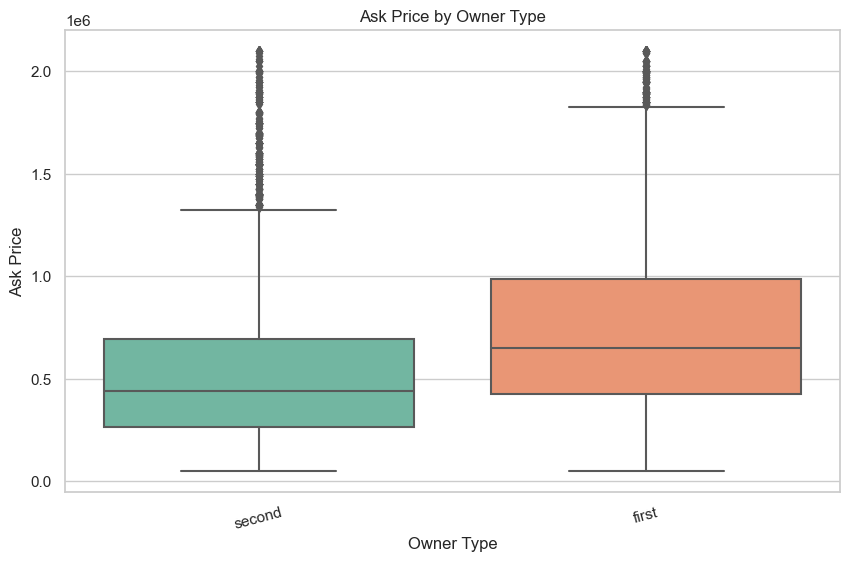

In [163]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Owner', y='AskPrice', palette='Set2')
plt.title("Ask Price by Owner Type")
plt.xlabel("Owner Type")
plt.ylabel("Ask Price")
plt.xticks(rotation=15)
plt.show()


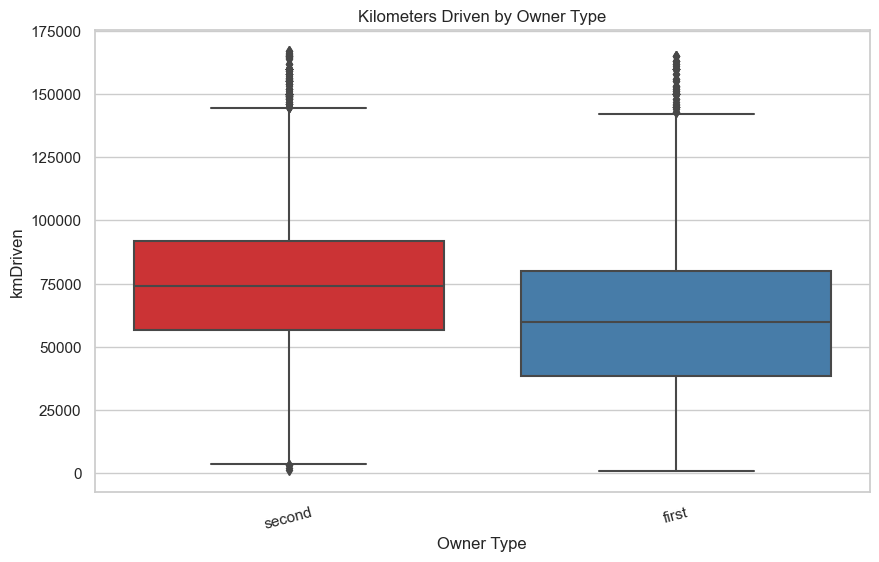

In [164]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Owner', y='kmDriven', palette='Set1')
plt.title("Kilometers Driven by Owner Type")
plt.xlabel("Owner Type")
plt.ylabel("kmDriven")
plt.xticks(rotation=15)
plt.show()


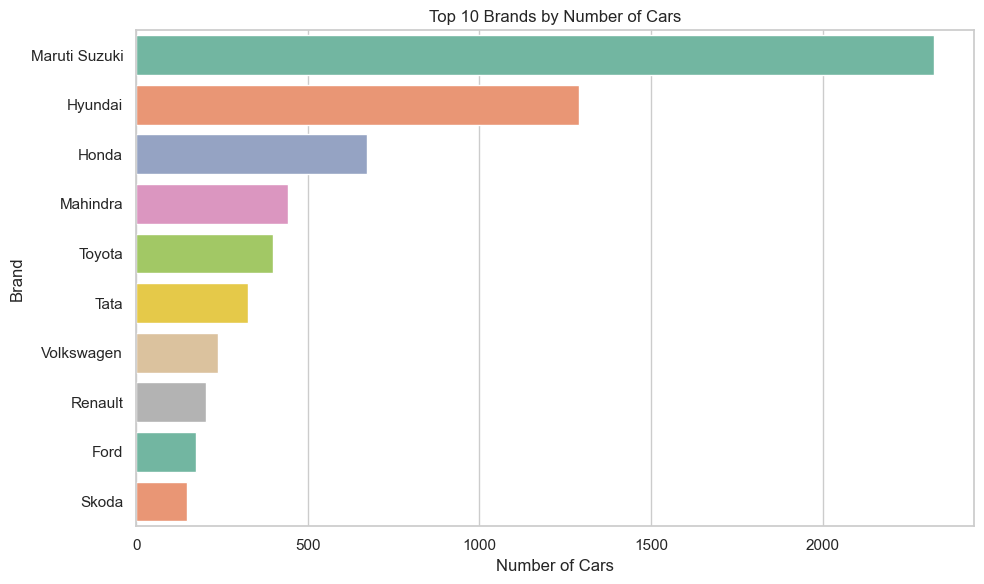

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1. Top 10 Most Frequent Brands
top_brands = df['Brand'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='Set2')
plt.title('Top 10 Brands by Number of Cars')
plt.xlabel('Number of Cars')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()


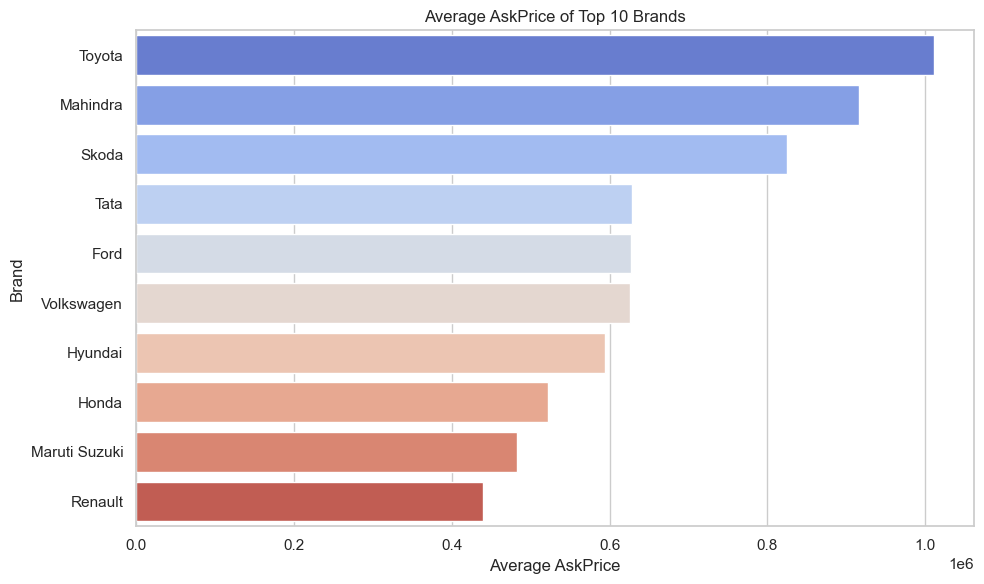

In [166]:
# 2. Average AskPrice per Brand (Top 10 by Count)
top_brand_names = top_brands.index.tolist()
brand_price = df[df['Brand'].isin(top_brand_names)].groupby('Brand')['AskPrice'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=brand_price.values, y=brand_price.index, palette='coolwarm')
plt.title('Average AskPrice of Top 10 Brands')
plt.xlabel('Average AskPrice')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()


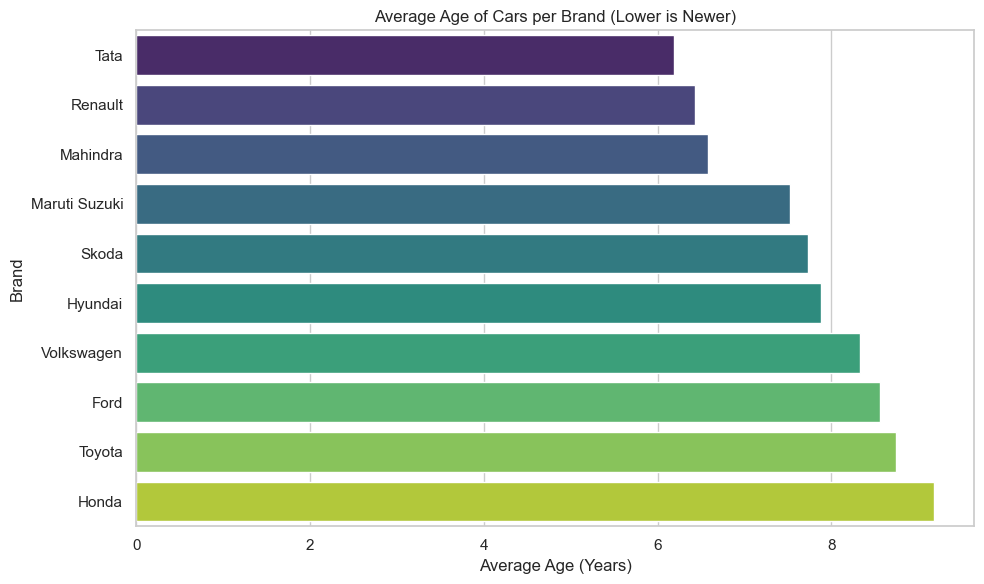

In [167]:
# 3. Brand vs Age – which brands are newer?
brand_age = df[df['Brand'].isin(top_brand_names)].groupby('Brand')['Age'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=brand_age.values, y=brand_age.index, palette='viridis')
plt.title('Average Age of Cars per Brand (Lower is Newer)')
plt.xlabel('Average Age (Years)')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()


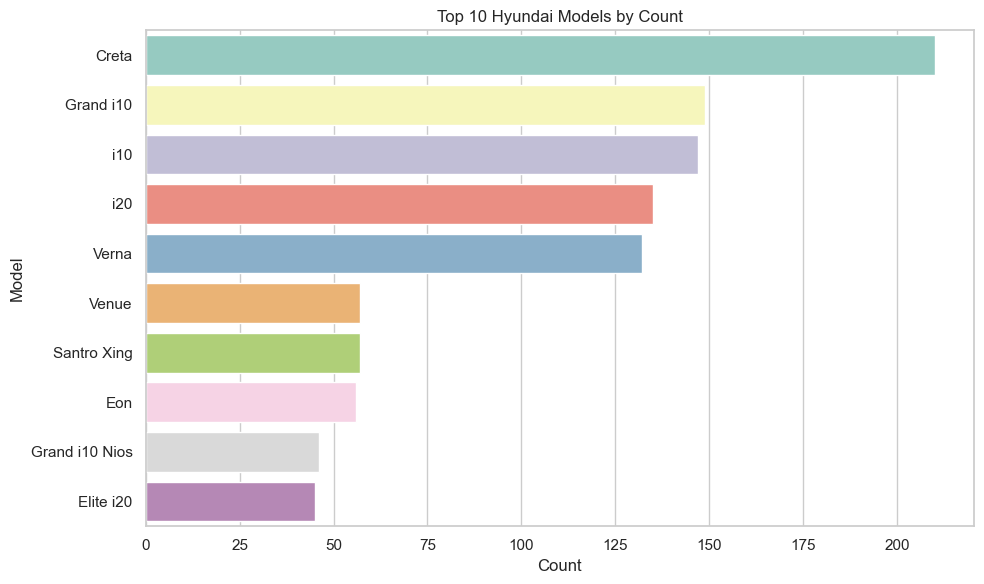

In [168]:
# Top models for a specific brand, say 'Hyundai'
hyundai_models = df[df['Brand'] == 'Hyundai']['model'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=hyundai_models.values, y=hyundai_models.index, palette='Set3')
plt.title('Top 10 Hyundai Models by Count')
plt.xlabel('Count')
plt.ylabel('Model')
plt.tight_layout()
plt.show()


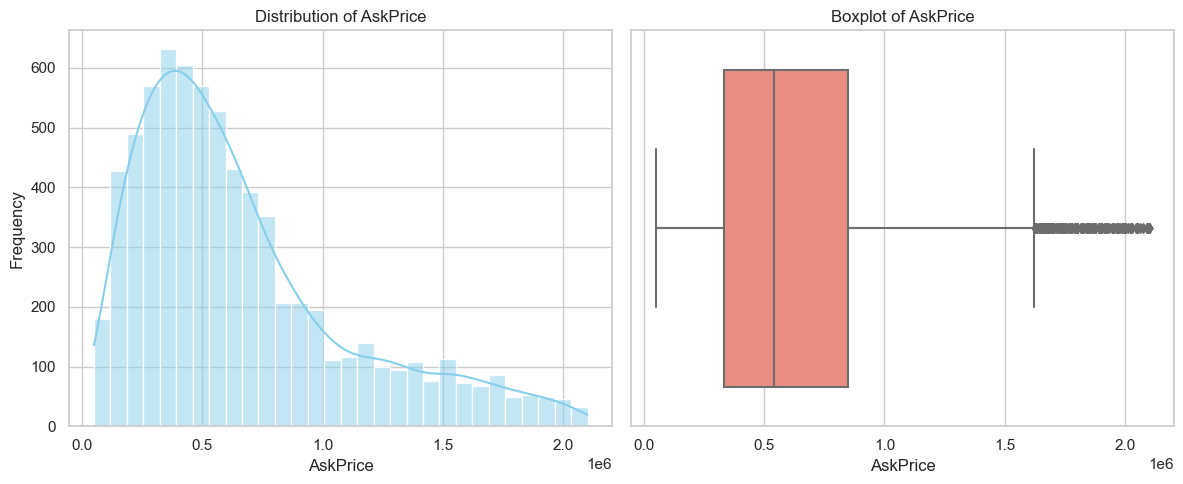

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plotting AskPrice - Histogram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['AskPrice'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of AskPrice')
plt.xlabel('AskPrice')
plt.ylabel('Frequency')

# Plotting AskPrice - Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['AskPrice'], color='salmon')
plt.title('Boxplot of AskPrice')
plt.xlabel('AskPrice')

plt.tight_layout()
plt.show()


In [170]:
df.columns


Index(['Brand', 'model', 'Year', 'Age', 'kmDriven', 'Transmission', 'Owner',
       'FuelType', 'PostedDate', 'AdditionInfo', 'AskPrice'],
      dtype='object')

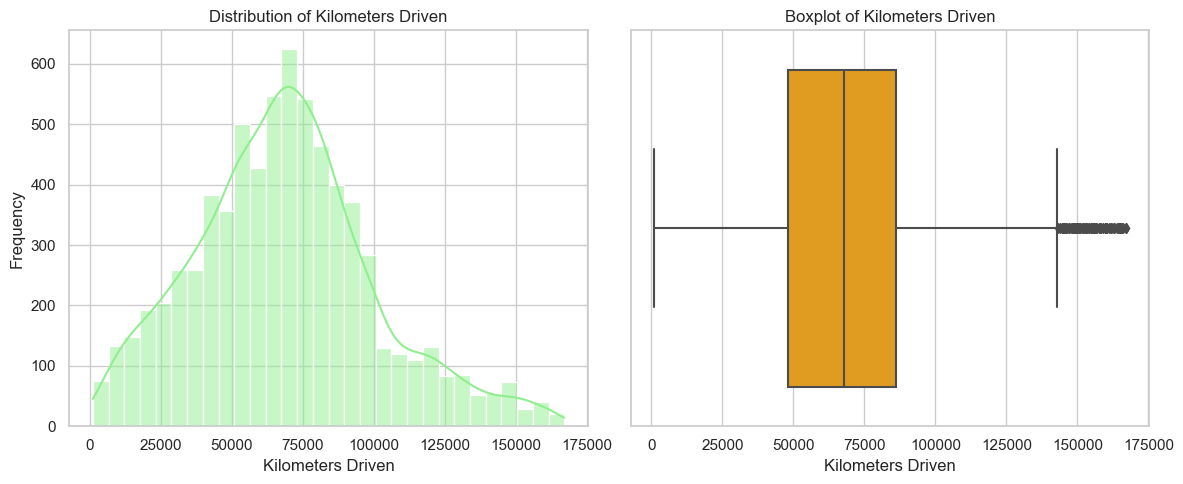

In [171]:
# Histogram and Boxplot for Kilometers Driven
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['kmDriven'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['kmDriven'], color='orange')
plt.title('Boxplot of Kilometers Driven')
plt.xlabel('Kilometers Driven')

plt.tight_layout()
plt.show()


In [172]:
# Correlation between Age and Kilometers Driven
correlation = df['Age'].corr(df['kmDriven'])
print(f"Correlation between Age and Kilometers Driven: {correlation:.3f}")


Correlation between Age and Kilometers Driven: 0.429


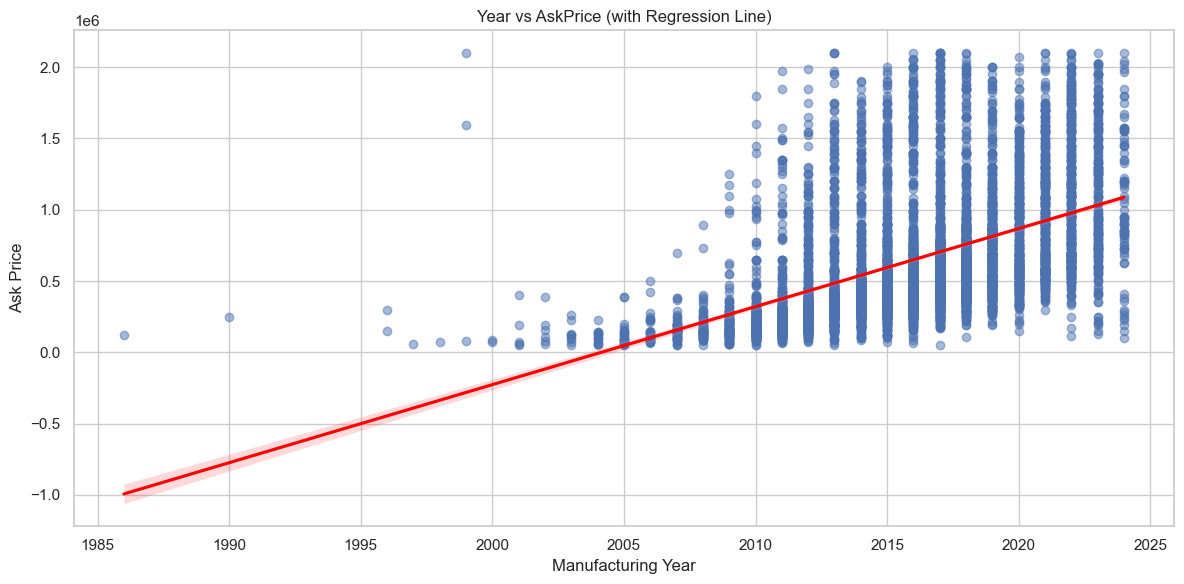

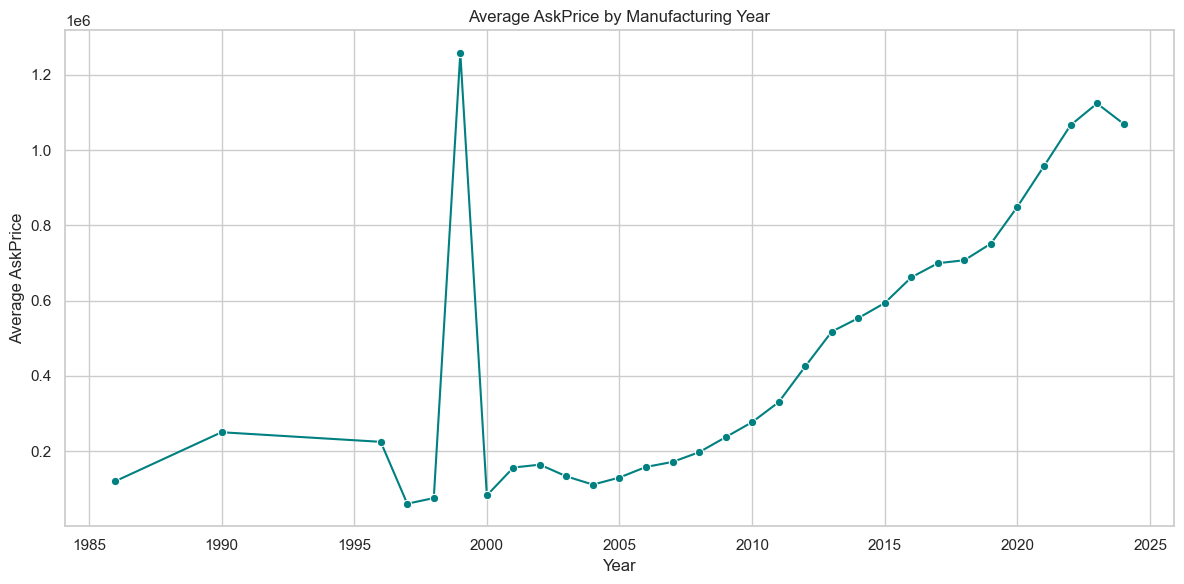

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Scatterplot with regression line
plt.figure(figsize=(12, 6))
sns.regplot(data=df, x='Year', y='AskPrice', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Year vs AskPrice (with Regression Line)')
plt.xlabel('Manufacturing Year')
plt.ylabel('Ask Price')
plt.tight_layout()
plt.show()

# Lineplot: Average AskPrice per Year
plt.figure(figsize=(12, 6))
avg_price_per_year = df.groupby('Year')['AskPrice'].mean().reset_index()
sns.lineplot(data=avg_price_per_year, x='Year', y='AskPrice', marker='o', color='teal')
plt.title('Average AskPrice by Manufacturing Year')
plt.xlabel('Year')
plt.ylabel('Average AskPrice')
plt.tight_layout()
plt.show()


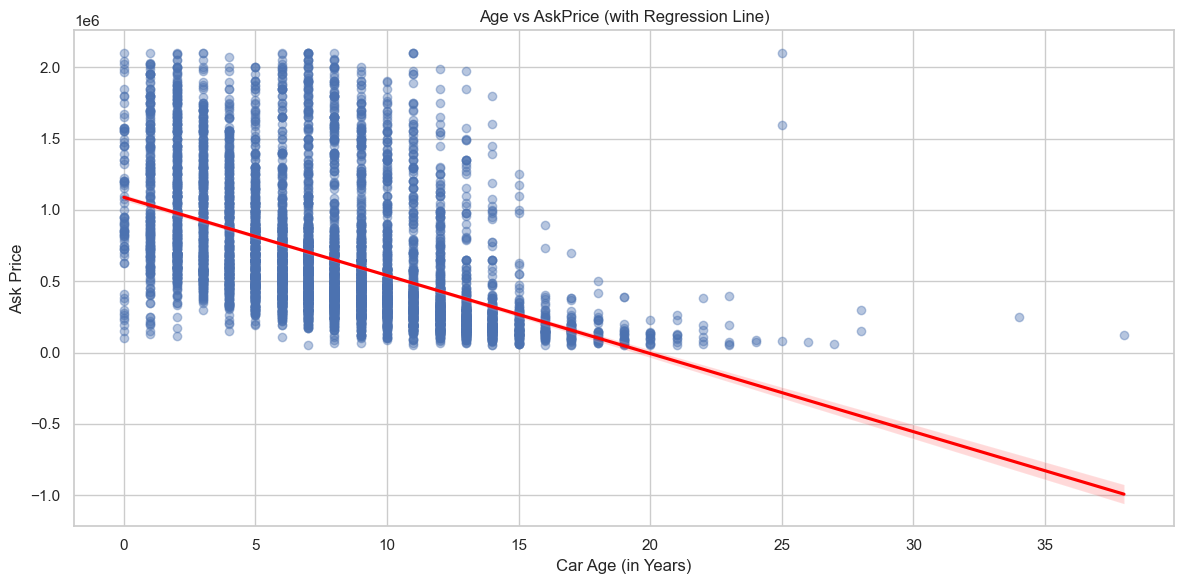

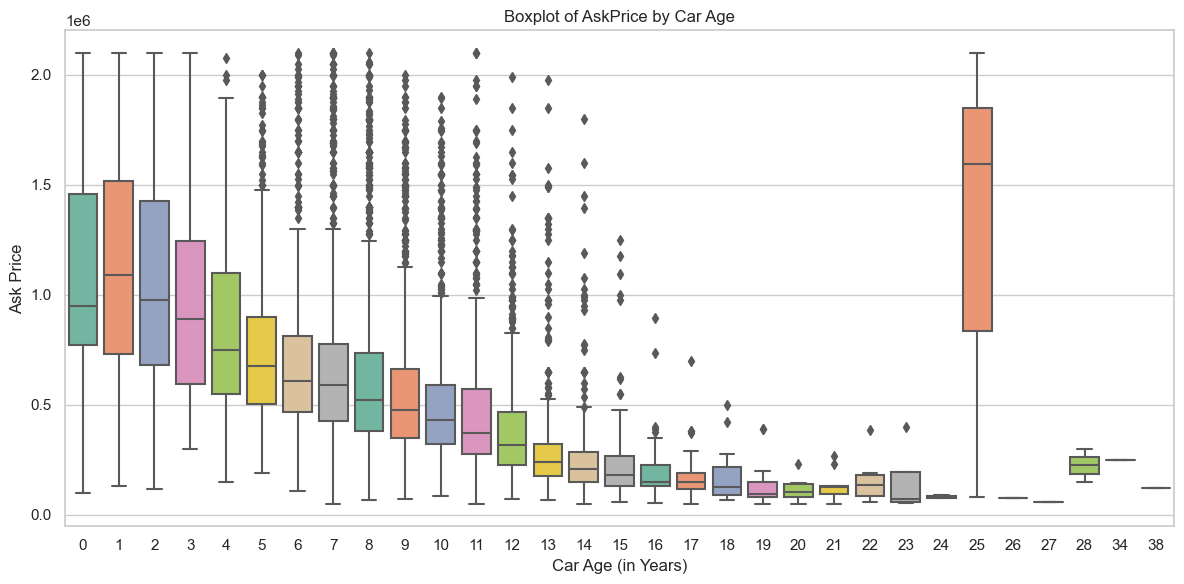

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Scatterplot with regression line
plt.figure(figsize=(12, 6))
sns.regplot(data=df, x='Age', y='AskPrice', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Age vs AskPrice (with Regression Line)')
plt.xlabel('Car Age (in Years)')
plt.ylabel('Ask Price')
plt.tight_layout()
plt.show()

# Boxplot to show spread of prices by Age
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age', y='AskPrice', palette='Set2')
plt.title('Boxplot of AskPrice by Car Age')
plt.xlabel('Car Age (in Years)')
plt.ylabel('Ask Price')
plt.tight_layout()
plt.show()


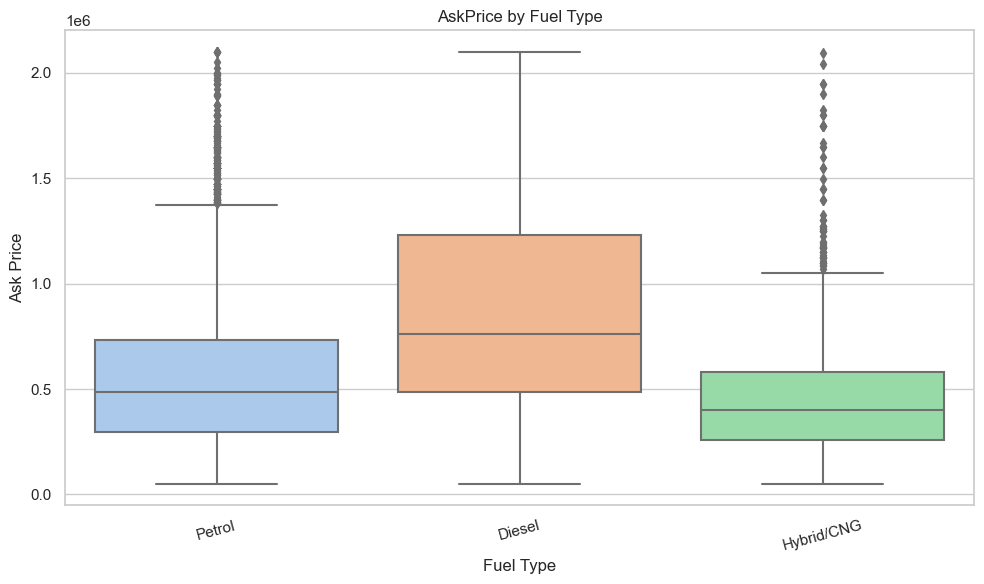

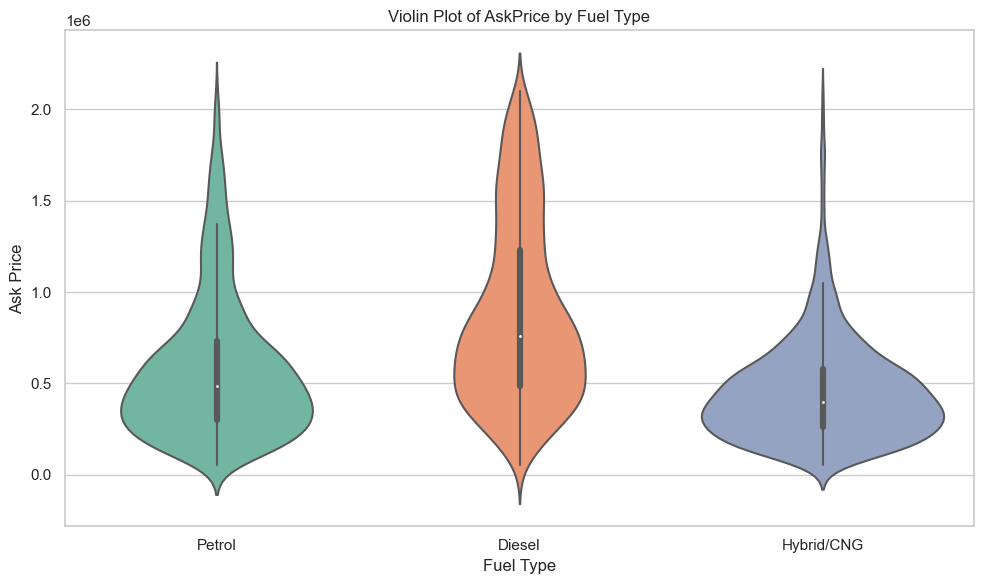

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Boxplot of Fuel Type vs AskPrice
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='FuelType', y='AskPrice', palette='pastel')
plt.title('AskPrice by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Ask Price')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Optional: Violin plot (more detailed distribution)
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='FuelType', y='AskPrice', palette='Set2')
plt.title('Violin Plot of AskPrice by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Ask Price')
plt.tight_layout()
plt.show()


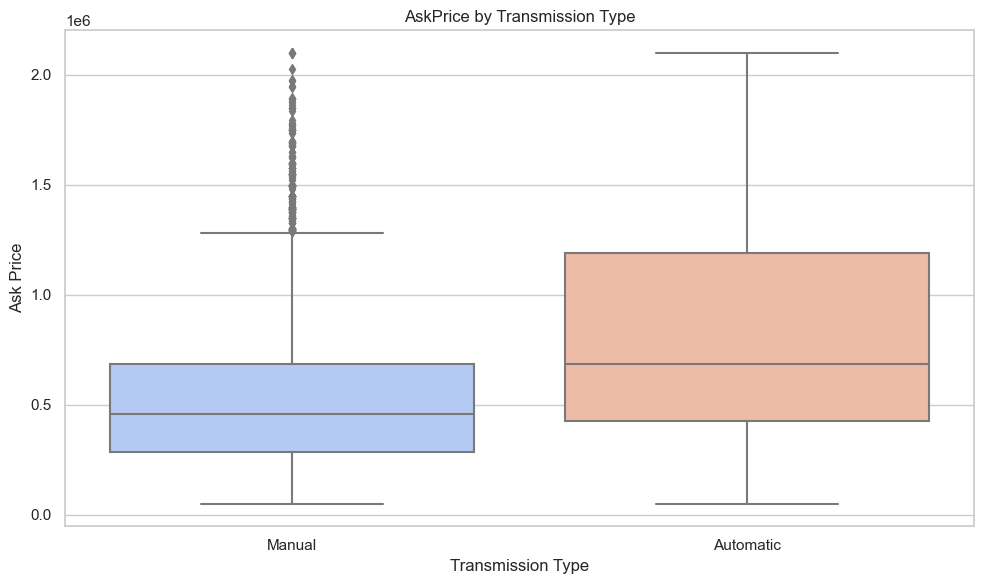

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Boxplot of Transmission vs AskPrice
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Transmission', y='AskPrice', palette='coolwarm')
plt.title('AskPrice by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Ask Price')
plt.tight_layout()
plt.show()


C:\Users\Hello\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


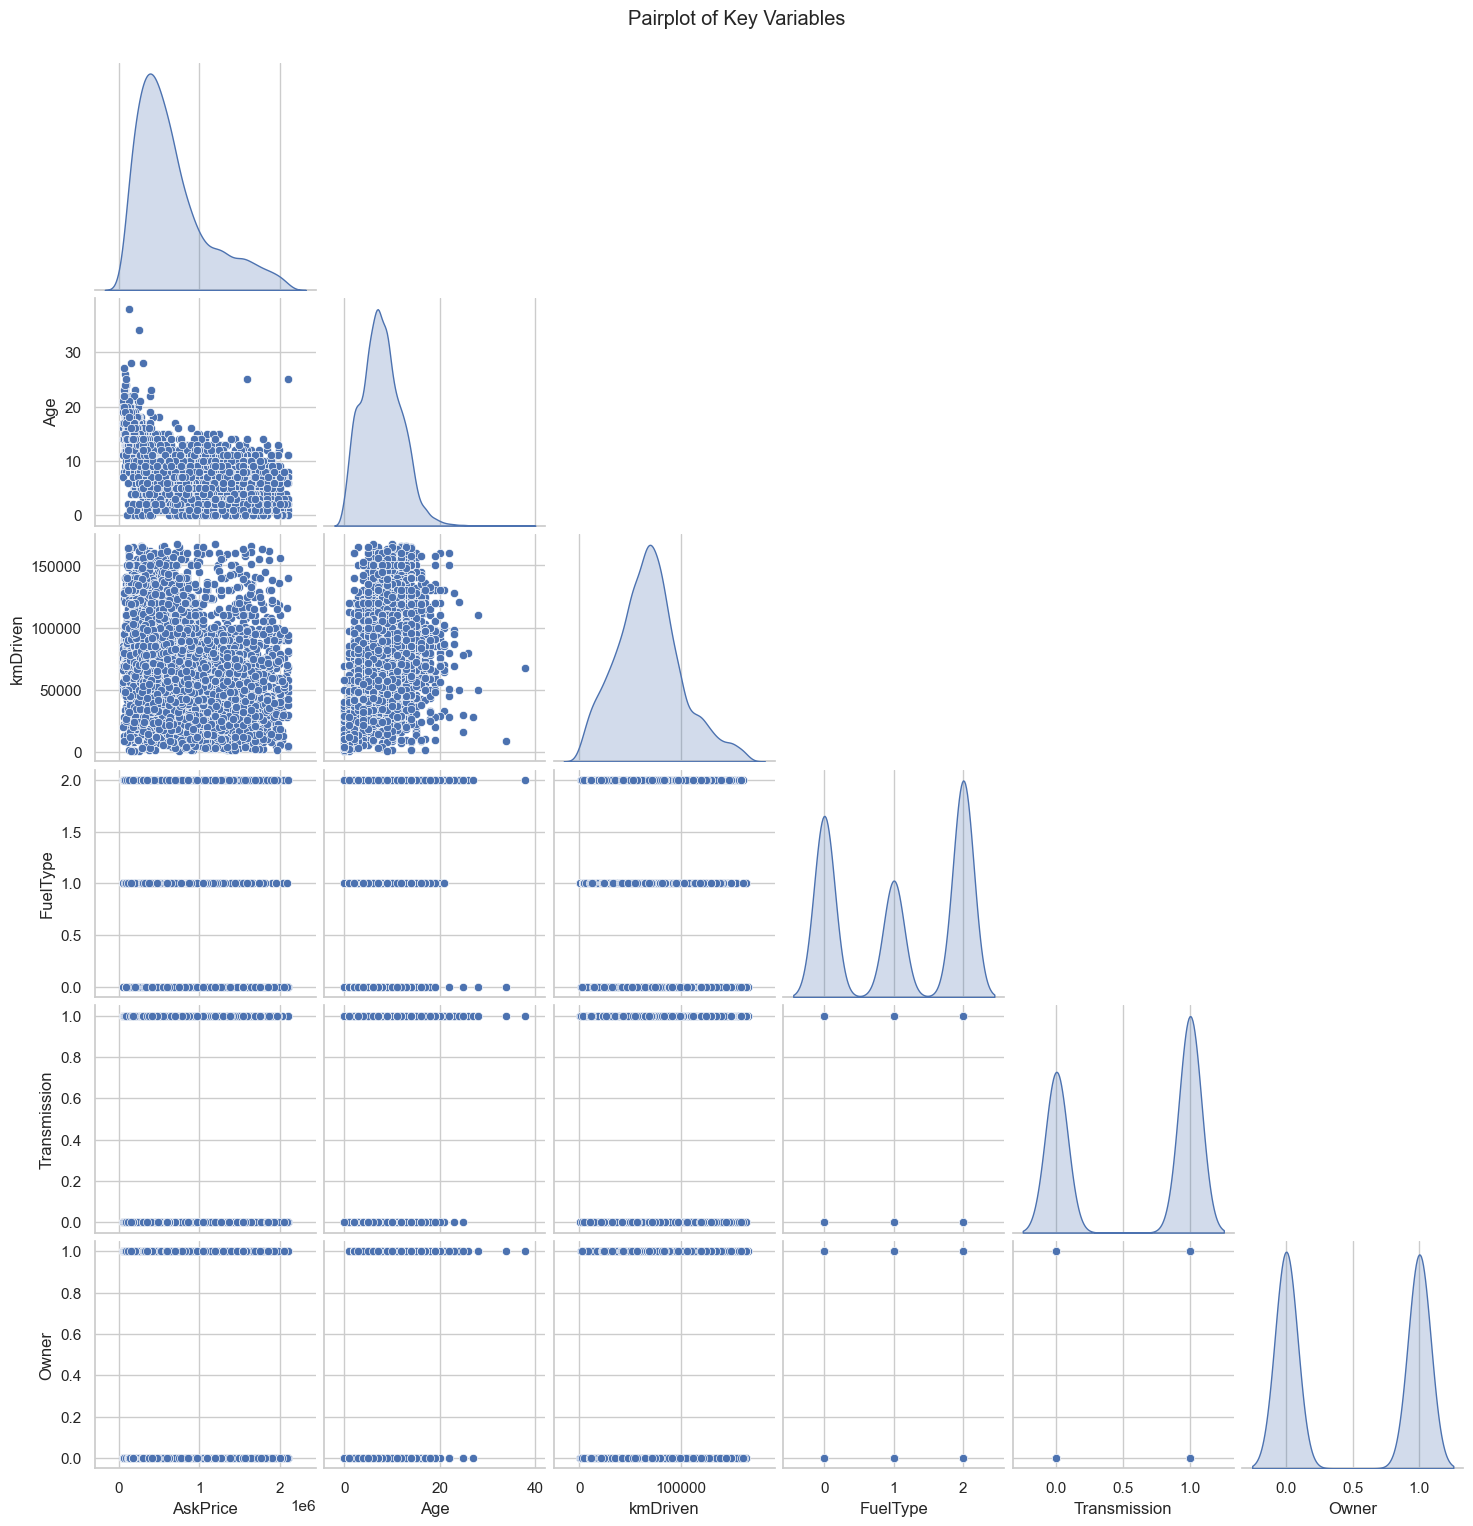

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns (convert FuelType to categorical codes for numeric plotting)
df_pair = df[['AskPrice', 'Age', 'kmDriven', 'FuelType', 'Transmission', 'Owner']].copy()
df_pair['FuelType'] = df_pair['FuelType'].astype('category').cat.codes
df_pair['Transmission'] = df_pair['Transmission'].astype('category').cat.codes
df_pair['Owner'] = df_pair['Owner'].astype('category').cat.codes

# Plot pairplot
sns.pairplot(df_pair, diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()


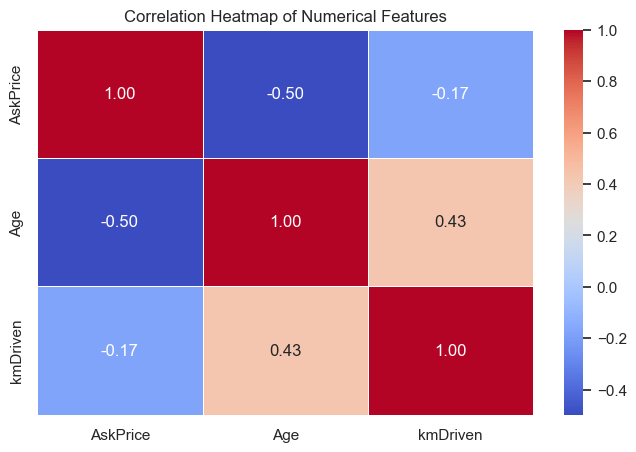

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_cols = ['AskPrice', 'Age', 'kmDriven']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [179]:
df.shape

(7091, 11)

In [180]:
df.columns

Index(['Brand', 'model', 'Year', 'Age', 'kmDriven', 'Transmission', 'Owner',
       'FuelType', 'PostedDate', 'AdditionInfo', 'AskPrice'],
      dtype='object')

In [181]:
df.columns

Index(['Brand', 'model', 'Year', 'Age', 'kmDriven', 'Transmission', 'Owner',
       'FuelType', 'PostedDate', 'AdditionInfo', 'AskPrice'],
      dtype='object')

In [182]:

df = df.drop(['PostedDate', 'AdditionInfo'], axis=1)


In [183]:
df.columns

Index(['Brand', 'model', 'Year', 'Age', 'kmDriven', 'Transmission', 'Owner',
       'FuelType', 'AskPrice'],
      dtype='object')

In [186]:
df.head()

df_n = df.copy()

In [187]:
df['Transmission'] = df['Transmission'].map({'Automatic': 0, 'Manual': 1})


In [188]:
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,AskPrice
0,Honda,City,2001,23,98000.0,1,second,Petrol,195000
2,Volkswagen,VentoTest,2010,14,77246.0,1,first,Diesel,184999
3,Maruti Suzuki,Swift,2017,7,83500.0,1,second,Diesel,565000
4,Maruti Suzuki,Baleno,2019,5,45000.0,0,first,Petrol,685000
5,BMW,X3,2014,10,83000.0,0,first,Diesel,1350000


In [189]:
df['Owner'].unique()

array(['second', 'first'], dtype=object)

In [190]:
df['FuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid/CNG'], dtype=object)

In [191]:
df['FuelType'] = df['FuelType'].map({'Petrol': 0, 'Diesel': 1, 'Hybrid/CNG': 2})


In [192]:
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,AskPrice
0,Honda,City,2001,23,98000.0,1,second,0,195000
2,Volkswagen,VentoTest,2010,14,77246.0,1,first,1,184999
3,Maruti Suzuki,Swift,2017,7,83500.0,1,second,1,565000
4,Maruti Suzuki,Baleno,2019,5,45000.0,0,first,0,685000
5,BMW,X3,2014,10,83000.0,0,first,1,1350000


In [193]:
df['Owner'] = df['Owner'].map({'first': 0, 'second': 1})


In [194]:
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,AskPrice
0,Honda,City,2001,23,98000.0,1,1,0,195000
2,Volkswagen,VentoTest,2010,14,77246.0,1,0,1,184999
3,Maruti Suzuki,Swift,2017,7,83500.0,1,1,1,565000
4,Maruti Suzuki,Baleno,2019,5,45000.0,0,0,0,685000
5,BMW,X3,2014,10,83000.0,0,0,1,1350000


In [199]:
df['Brand'].nunique()


33

In [201]:
df

,Brand,model,Year,kmDriven,Transmission,Owner,FuelType,AskPrice
0,Honda,City,2001,98000.0,1,1,0,195000
2,Volkswagen,VentoTest,2010,77246.0,1,0,1,184999
3,Maruti Suzuki,Swift,2017,83500.0,1,1,1,565000
4,Maruti Suzuki,Baleno,2019,45000.0,0,0,0,685000
5,BMW,X3,2014,83000.0,0,0,1,1350000
...,...,...,...,...,...,...,...,...
9577,Skoda,Octavia,2014,105904.0,0,1,1,1040000
9578,Maruti Suzuki,Alto-800,2020,55000.0,1,0,2,375000
9579,Maruti Suzuki,Ritz,2013,92000.0,1,0,1,415000
9580,Hyundai,Verna,2019,72000.0,0,0,0,855000


In [202]:
df['brand_number'] = pd.factorize(df['Brand'])[0]
df['model_number'] = pd.factorize(df['model'])[0]


In [203]:
df

,Brand,model,Year,kmDriven,Transmission,Owner,FuelType,AskPrice,brand_number,model_number
0,Honda,City,2001,98000.0,1,1,0,195000,0,0
2,Volkswagen,VentoTest,2010,77246.0,1,0,1,184999,1,1
3,Maruti Suzuki,Swift,2017,83500.0,1,1,1,565000,2,2
4,Maruti Suzuki,Baleno,2019,45000.0,0,0,0,685000,2,3
5,BMW,X3,2014,83000.0,0,0,1,1350000,3,4
...,...,...,...,...,...,...,...,...,...,...
9577,Skoda,Octavia,2014,105904.0,0,1,1,1040000,11,134
9578,Maruti Suzuki,Alto-800,2020,55000.0,1,0,2,375000,2,62
9579,Maruti Suzuki,Ritz,2013,92000.0,1,0,1,415000,2,43
9580,Hyundai,Verna,2019,72000.0,0,0,0,855000,6,26


In [204]:
# Reorder columns
cols = list(df.columns)
cols.remove('brand_number')
cols.remove('model_number')
brand_idx = cols.index('Brand')
model_idx = cols.index('model')

# Insert brand_number after Brand, and model_number after model
cols.insert(brand_idx + 1, 'brand_number')
cols.insert(model_idx + 2, 'model_number')

# Reassign reordered columns to df
df = df[cols]


In [205]:
df


,Brand,brand_number,model,model_number,Year,kmDriven,Transmission,Owner,FuelType,AskPrice
0,Honda,0,City,0,2001,98000.0,1,1,0,195000
2,Volkswagen,1,VentoTest,1,2010,77246.0,1,0,1,184999
3,Maruti Suzuki,2,Swift,2,2017,83500.0,1,1,1,565000
4,Maruti Suzuki,2,Baleno,3,2019,45000.0,0,0,0,685000
5,BMW,3,X3,4,2014,83000.0,0,0,1,1350000
...,...,...,...,...,...,...,...,...,...,...
9577,Skoda,11,Octavia,134,2014,105904.0,0,1,1,1040000
9578,Maruti Suzuki,2,Alto-800,62,2020,55000.0,1,0,2,375000
9579,Maruti Suzuki,2,Ritz,43,2013,92000.0,1,0,1,415000
9580,Hyundai,6,Verna,26,2019,72000.0,0,0,0,855000


In [207]:
print(df[(df['Brand'] == 'Toyota') & (df['model'] == 'Innova')])

       Brand  brand_number   model  model_number  Year  kmDriven  \
31    Toyota             5  Innova            20  2011   84000.0   
67    Toyota             5  Innova            20  2011  100231.0   
283   Toyota             5  Innova            20  2014  105000.0   
353   Toyota             5  Innova            20  2016   69000.0   
395   Toyota             5  Innova            20  2012  121000.0   
...      ...           ...     ...           ...   ...       ...   
8597  Toyota             5  Innova            20  2015  150000.0   
8639  Toyota             5  Innova            20  2011  165000.0   
8948  Toyota             5  Innova            20  2015  132000.0   
9061  Toyota             5  Innova            20  2014  126500.0   
9291  Toyota             5  Innova            20  2007   50000.0   

      Transmission  Owner  FuelType  AskPrice  
31               1      1         1    490000  
67               1      1         1    429101  
283              1      1         1    

In [208]:
df_model = df.copy()

In [209]:
df_model.head()

,Brand,brand_number,model,model_number,Year,kmDriven,Transmission,Owner,FuelType,AskPrice
0,Honda,0,City,0,2001,98000.0,1,1,0,195000
2,Volkswagen,1,VentoTest,1,2010,77246.0,1,0,1,184999
3,Maruti Suzuki,2,Swift,2,2017,83500.0,1,1,1,565000
4,Maruti Suzuki,2,Baleno,3,2019,45000.0,0,0,0,685000
5,BMW,3,X3,4,2014,83000.0,0,0,1,1350000


In [210]:
df3 = df.drop(['Brand', 'model'], axis=1)

In [211]:
df3.head()

,brand_number,model_number,Year,kmDriven,Transmission,Owner,FuelType,AskPrice
0,0,0,2001,98000.0,1,1,0,195000
2,1,1,2010,77246.0,1,0,1,184999
3,2,2,2017,83500.0,1,1,1,565000
4,2,3,2019,45000.0,0,0,0,685000
5,3,4,2014,83000.0,0,0,1,1350000


In [212]:
X = df3.drop(['AskPrice'],axis='columns')
X.head(5)

,brand_number,model_number,Year,kmDriven,Transmission,Owner,FuelType
0,0,0,2001,98000.0,1,1,0
2,1,1,2010,77246.0,1,0,1
3,2,2,2017,83500.0,1,1,1
4,2,3,2019,45000.0,0,0,0
5,3,4,2014,83000.0,0,0,1


In [213]:
y = df3.AskPrice
y.head(5)

0     195000
2     184999
3     565000
4     685000
5    1350000
Name: AskPrice, dtype: int64

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [215]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.3780125096014709

In [216]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))


0.8120230325811684


In [217]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
print("Gradient Boosting Score:", gb.score(X_test, y_test))


Gradient Boosting Score: 0.7533340898487284


In [218]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
print("XGBoost Score:", xgb.score(X_test, y_test))


XGBoost Score: 0.8425090129902261


In [219]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
print("Decision Tree Score:", dt.score(X_test, y_test))


Decision Tree Score: 0.6787285270590766


In [220]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print("KNN Score:", knn.score(X_test_scaled, y_test))


KNN Score: 0.591893082704132


In [226]:
import numpy as np
def predict_price(brand_number,model_number,Year,kmDriven,Transmission,Owner,FuelType):    
    x = np.zeros(len(X.columns))
    x[0] = brand_number
    x[1] = model_number
    x[2] = Year
    x[3] = kmDriven
    x[4] = kmDriven
    x[5] = Owner
    x[6] = FuelType

    return xgb.predict([x])[0]

In [227]:
predict_price(5,20,2011,90000,1,0,1)

593597.06

In [229]:
predict_price(5,20,2011,90000,1,1,1)

563858.94

In [230]:
predict_price(5,20,2011,80000,1,1,1)

594683.4

In [231]:
predict_price(5,20,2011,100000,1,1,1)

555775.1

In [232]:
predict_price(5,20,2011,140000,1,1,1)

560126.9

In [238]:
predict_price(5,20,2011,60000,1,1,1)

671402.7

In [240]:
#6	Verna	26	2019	72000.0	0	0	0	855000

predict_price(6,26,2019,72000,0,0,0)

829085.06

In [244]:
predict_price(6,26,2019,80000,0,0,0)

822771.9

In [245]:
import pickle
with open('car_price_prediction.pickle','wb') as f:
    pickle.dump(xgb,f)

In [246]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))